In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
df_all = pd.DataFrame()
reads_info = pd.DataFrame(columns=['mean','max'])
reads_info

,mean,max


In [3]:
def extract_read_info(df):
    return {'mean': df['reactivity'].mean(), 'max': df['reactivity'].max(), 'min': df['reactivity'].min(), 'count': df['reactivity'].count()}

In [4]:
#concatenate all the SHAPE files
import os
entries = os.scandir(r'C:\Users\irisx\OneDrive\Desktop\AStar\PDB_shape\shape')
i = 0
for entry in entries:
    df = pd.read_csv(entry, delimiter = "\t", header=None, names=["index", "reactivity"])
    df_v = df[df['reactivity']!=-999]
    reads_info = reads_info.append(extract_read_info(df_v), ignore_index=True)
    df_all = pd.concat([df_all, df], ignore_index=True, sort=False)
    i = i+1

print('the number of files: ', i)

the number of files:  274


In [5]:
reads_info

,mean,max,count,min
0,0.539001,2.946678,72.0,-0.240080
1,0.749274,4.020329,55.0,-0.128231
2,0.480546,3.193697,117.0,-0.384507
3,0.319694,1.140891,52.0,-0.713761
4,0.352171,2.038399,54.0,-0.369564
...,...,...,...,...
269,0.352357,2.231179,172.0,-0.476119
270,0.360416,1.767223,78.0,-0.259441
271,0.494195,3.536694,116.0,-0.276612
272,0.577612,3.907844,149.0,-0.538354


In [6]:
#the summary of reads records
reads_info.describe()

,mean,max,count,min
count,263.000000,263.000000,274.000000,263.000000
mean,0.480642,4.001451,93.138686,-0.475174
std,0.114595,2.118495,46.264993,0.452250
min,0.146207,1.140891,0.000000,-3.644525
25%,0.396064,2.672278,68.000000,-0.510811
50%,0.476546,3.503440,77.000000,-0.349252
75%,0.566645,4.598387,116.000000,-0.256707
max,0.755068,17.253573,266.000000,-0.071552


In [7]:
df_all

,index,reactivity
0,1,-999.000000
1,2,-999.000000
2,3,-0.044254
3,4,0.174412
4,5,0.028481
...,...,...
30426,99,0.175862
30427,100,0.269238
30428,101,0.101473
30429,102,-0.080410


In [8]:
#count the number of -999s #cannot be determined
(df_all['reactivity']==-999).value_counts()

False    25520
True      4911
Name: reactivity, dtype: int64

In [9]:
#count the percentage of valid data
(df_all['reactivity']==-999).value_counts()[0]/df_all.count()

index         0.838619
reactivity    0.838619
dtype: float64

In [10]:
#count the negative values, excluding -999
((df_all['reactivity']<0) & (df_all['reactivity']!=-999)).value_counts()

False    26319
True      4112
Name: reactivity, dtype: int64

In [11]:
df_valid = df_all[df_all['reactivity']!=-999]

In [12]:
#reset the index
df_valid.reset_index(drop=True)

,index,reactivity
0,3,-0.044254
1,4,0.174412
2,5,0.028481
3,6,0.263270
4,7,0.238318
...,...,...
25515,98,0.004832
25516,99,0.175862
25517,100,0.269238
25518,101,0.101473


In [13]:
df_valid['reactivity'].describe()

count    25520.000000
mean         0.485259
std          0.755500
min         -3.644525
25%          0.073156
50%          0.279065
75%          0.644701
max         17.253573
Name: reactivity, dtype: float64

In [14]:
# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt 
 
# to ignore the warnings
from warnings import filterwarnings

C:\Users\irisx\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reactivity'>

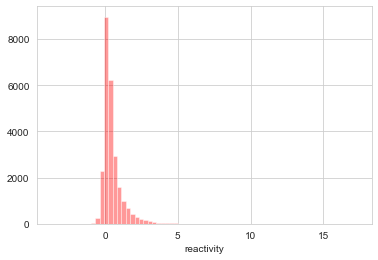

In [15]:
sns.set_style('whitegrid')
sns.distplot(df_valid['reactivity'], kde = False, color ='red', bins = 70)

(array([2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        4.000e+00, 1.000e+01, 9.000e+00, 4.800e+01, 2.700e+02, 2.280e+03,
        8.967e+03, 6.239e+03, 2.955e+03, 1.596e+03, 9.750e+02, 6.810e+02,
        4.200e+02, 2.870e+02, 2.280e+02, 1.570e+02, 1.140e+02, 6.100e+01,
        5.000e+01, 4.000e+01, 2.200e+01, 2.000e+01, 1.400e+01, 1.200e+01,
        4.000e+00, 1.000e+01, 2.000e+00, 8.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.644525  , -3.34598074, -3.04743649, -2.74889223, -2.45034797,
        -2.15180371, -1.85325946, -1.5547152 , -1.25617094,

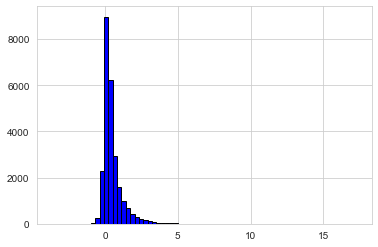

In [16]:
plt.hist(df_valid['reactivity'], color = 'blue', edgecolor = 'black',bins = 70)

<AxesSubplot:xlabel='reactivity', ylabel='Density'>

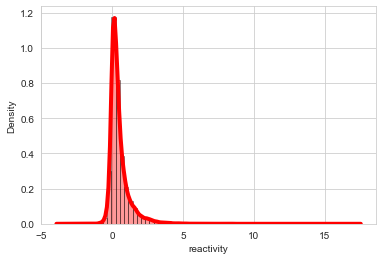

In [17]:
# Density Plot 
sns.distplot(df_valid['reactivity'], hist=True, kde=True, 
             bins=70, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})